In [1]:
import re

import cdx_toolkit
from bs4 import BeautifulSoup

import json
import demjson

from IPython.display import HTML
import pandas as pd

In [2]:
cdx = cdx_toolkit.CDXFetcher(source='cc')

In [3]:
pd.options.display.max_colwidth = 150

## Indeed

In [4]:
objs = list(cdx.iter('au.indeed.com/*',
                     from_ts='202004', to='202005',
                     limit=50, 
                     filter=['status:200']))
pd.DataFrame(objs)

,charset,digest,filename,languages,length,mime,mime-detected,offset,status,timestamp,url,urlkey
0,UTF-8,SUS5VGDGUMKJAZ7GN6T4LYMTNA2NWCSU,crawl-data/CC-MAIN-2020-16/segments/1585371896913.98/warc/CC-MAIN-20200410110538-20200410141038-00441.warc.gz,eng,87919,text/html,text/html,335167477,200,20200410140752,"https://au.indeed.com/$110,000-jobs-in-Dinmore-QLD","com,indeed,au)/$110,000-jobs-in-dinmore-qld"
1,UTF-8,FXO2T22MGLBZVE4S6DIOANRL5T7NUMPJ,crawl-data/CC-MAIN-2020-16/segments/1585371624083.66/warc/CC-MAIN-20200406102322-20200406132822-00295.warc.gz,eng,80016,text/html,text/html,350051882,200,20200406122949,"https://au.indeed.com/$110,000-jobs-in-Quinns-Rocks-WA","com,indeed,au)/$110,000-jobs-in-quinns-rocks-wa"
2,UTF-8,CYXMCOYDZZ2VI2FBC3QKT4EQB53POQTA,crawl-data/CC-MAIN-2020-16/segments/1585371618784.58/warc/CC-MAIN-20200406035448-20200406065948-00352.warc.gz,eng,87620,text/html,text/html,348171424,200,20200406060907,"https://au.indeed.com/$110,600-jobs-in-Rodd-Point-NSW","com,indeed,au)/$110,600-jobs-in-rodd-point-nsw"
3,UTF-8,D5QLEI7LBPZYG5IGSM7GJ3MEB7RWPA43,crawl-data/CC-MAIN-2020-16/segments/1585371807538.83/warc/CC-MAIN-20200408010207-20200408040707-00279.warc.gz,eng,84586,text/html,text/html,371777629,200,20200408011304,"https://au.indeed.com/$110,700-jobs-in-Woolner-NT","com,indeed,au)/$110,700-jobs-in-woolner-nt"
4,UTF-8,PS46BDU6XKSHV4HO5KOBKUUDIYXHGOYQ,crawl-data/CC-MAIN-2020-16/segments/1585371896913.98/warc/CC-MAIN-20200410110538-20200410141038-00012.warc.gz,eng,86821,text/html,text/html,351049090,200,20200410135327,"https://au.indeed.com/$130,000-jobs-in-Flinders-Lane-VIC","com,indeed,au)/$130,000-jobs-in-flinders-lane-vic"
5,UTF-8,ZH53DGWTQZGXTDV2RDLP6PQACUZLEPIJ,crawl-data/CC-MAIN-2020-16/segments/1585370506870.41/warc/CC-MAIN-20200402080824-20200402110824-00495.warc.gz,eng,84190,text/html,text/html,337139560,200,20200402095317,"https://au.indeed.com/$132,700-jobs-in-Warwick-WA","com,indeed,au)/$132,700-jobs-in-warwick-wa"
6,UTF-8,BTKJNOLRSE2CREODQPZK4JLD6UBLDPZQ,crawl-data/CC-MAIN-2020-16/segments/1585371806302.78/warc/CC-MAIN-20200407214925-20200408005425-00356.warc.gz,eng,79981,text/html,text/html,355360319,200,20200408002615,"https://au.indeed.com/$140,000-jobs-in-Quinns-Rocks-WA","com,indeed,au)/$140,000-jobs-in-quinns-rocks-wa"
7,UTF-8,EGN7N53REECODNQBS6QZG26AYQNVKB7U,crawl-data/CC-MAIN-2020-16/segments/1585370520039.50/warc/CC-MAIN-20200404042338-20200404072338-00073.warc.gz,eng,86710,text/html,text/html,364638210,200,20200404055103,"https://au.indeed.com/$140,000-jobs-in-Rodd-Point-NSW","com,indeed,au)/$140,000-jobs-in-rodd-point-nsw"
8,UTF-8,YQB5EKFD72C2K47S5UB7ANL7ATCUTHN3,crawl-data/CC-MAIN-2020-16/segments/1585371805747.72/warc/CC-MAIN-20200407183818-20200407214318-00495.warc.gz,eng,83900,text/html,text/html,347012528,200,20200407211904,"https://au.indeed.com/$301,000-jobs-in-Peak-Crossing-QLD","com,indeed,au)/$301,000-jobs-in-peak-crossing-qld"
9,UTF-8,3MSK4SGITTW75C5QANUX2LGS4ZCKBL23,crawl-data/CC-MAIN-2020-16/segments/1585371824409.86/warc/CC-MAIN-20200408202012-20200408232512-00433.warc.gz,eng,85660,text/html,text/html,337399156,200,20200408221826,"https://au.indeed.com/$50,000-jobs-in-Bribie-Island-QLD","com,indeed,au)/$50,000-jobs-in-bribie-island-qld"


Indeed Contains:

* Title
* Company
* Location
* First 25 words of ad text
* Sometimes salary

In [5]:
with open('test.html', 'w') as f:
    f.write(objs[0].content.decode('utf-8'))

None


In [6]:
soup = BeautifulSoup(objs[0].content)

In [7]:
urls = [a['href'] for a in soup.select('a.jobtitle')]
urls

['/rc/clk?jk=028bf2018beebedb&fccid=59b04a51f1164f7e&vjs=3',
 '/rc/clk?jk=d9ea2b72aae1bd1f&fccid=92dfe858c4b585f9&vjs=3',
 '/rc/clk?jk=34add443e5138142&fccid=a4a93a5cf946e3ad&vjs=3',
 '/rc/clk?jk=2d59eb05949f2081&fccid=edae4285faf6c2f0&vjs=3',
 '/rc/clk?jk=be8468dce830f059&fccid=ea26a03c73e2d4e9&vjs=3',
 '/rc/clk?jk=bf0dced454efd688&fccid=a7eb6e72c143133c&vjs=3',
 '/rc/clk?jk=e26927c40a677590&fccid=b155cdcdabd4ee03&vjs=3',
 '/rc/clk?jk=d5703b74c268f0b6&fccid=9eb3b6eca8bf5aac&vjs=3',
 '/rc/clk?jk=573786223f902b3b&fccid=ea26a03c73e2d4e9&vjs=3',
 '/rc/clk?jk=060a5ceb47fda90c&fccid=6e557affe98df478&vjs=3']

In [8]:
base_url = objs[0].data['url']
base_url = base_url[:base_url.find('/', 8)]

In [9]:
param = re.match('/rc/clk\?(jk=[^&]+)', urls[0]).group(1)
param

'jk=028bf2018beebedb'

In [10]:
import requests

Retrieve the job by some url manipulation

In [12]:
url = f'{base_url}/viewjob?{param}'

In [13]:
r = requests.get(url)

In [14]:
r.status_code

200

In [15]:
with open('test.html', 'wb') as f:
    f.write(r.content)

Metadata is a bit tricky to get

In [16]:
start = 'window._initialData='

In [17]:
start_idx = r.text.find(start) + len(start)

In [18]:
def get_object(text):
    depth = 0
    inquote = False
    escape = False
    for idx, char in enumerate(text):
        if escape:
            escape = False
            continue
        if char == '"':
            inquote = not inquote
        if  char == '\\':
            escape = True
        if (not inquote) and char == '{':
            depth += 1
        if (not inquote) and char == '}':
            depth -= 1
            if depth <= 0:
                break
    return text[:idx+1]

In [19]:
obj_text = get_object(r.text[start_idx:])

In [20]:
obj_text

'{"base64EncodedJson":"eyJhIjp0cnVlLCJjIjp0cnVlLCJkIjpmYWxzZSwiZSI6dHJ1ZSwiZyI6Imh0dHA6Ly9hdS5pbmRlZWQuY29tL20vYmFzZWNhbXAvdmlld2pvYj9qaz0wMjhiZjIwMThiZWViZWRiIiwiaCI6IlZhcmlvdXMgUHJvamVjdCBDb250cm9scyAmIFBsYW5uaW5nIFBvc2l0aW9ucyIsImkiOiJCcmlzYmFuZSBRTEQiLCJqIjoib3JnYW5pYyIsImwiOiIifQ","baseInboxUrl":"https:\\u002F\\u002Finbox.indeed.com","baseUrl":"https:\\u002F\\u002Fau.indeed.com","clientsideProctorGroups":{"mobcompanylinktst":true,"mobvj_hideapplyemail_tst":false,"mobvjpsfeedbacktst":false,"jasx_track_multisession_noapplies":false,"sal_insights_tab_redesign_tst":false,"jasx_hidephonenumber_tst":false},"companyFollowForm":{"addAlertUrl":"\\u002Falert?a=add&alert_params=followCompany%3Dadfbfa8ae907519e&q=company%3A%27SNC-Lavalin%27&alert_period=weekly&output=json&verified=0&tk=1eaook86k36bm000&hct=4c021f433b8dd134463a497cf3645afa","cancelText":"By creating a company alert you agree to our <a href=\\"\\u002Flegal\\" target=\\"_blank\\">Terms<\\u002Fa>. You can change your consent sett

In [21]:
data = json.loads(obj_text)

In [22]:
data.keys()

dict_keys(['base64EncodedJson', 'baseInboxUrl', 'baseUrl', 'clientsideProctorGroups', 'companyFollowForm', 'country', 'ctk', 'dcmModel', 'desktop', 'desktopSponsoredJobSeenData', 'dgToken', 'googleOneTapModel', 'indeedChatEmployerModel', 'jobKey', 'jobLocation', 'jobSeenData', 'jobTitle', 'language', 'locale', 'localeData', 'mobtk', 'notifications', 'originalJobLinkModel', 'pageId', 'relatedLinks', 'reportJobForm', 'saveJobButtonContainerModel', 'saveJobCalloutModel', 'saveJobFailureModalModel', 'saveJobLimitExceededModalModel', 'stickyType', 'validationToken', 'viewJobButtonLinkContainerModel', 'viewJobDisplay'])

In [23]:
data['jobLocation']

'Brisbane QLD'

In [24]:
data['jobTitle']

'Various Project Controls & Planning Positions'

In [25]:
data['jobKey']

'028bf2018beebedb'

In [26]:
soup = BeautifulSoup(r.content)

Job Text

In [31]:
soup.select('#jobDescriptionText')[0]

<div class="jobsearch-jobDescriptionText" id="jobDescriptionText"><div><p>Founded in 1911, SNC-Lavalin Atkins is a global fully integrated professional services and project management company and a major player in the ownership of infrastructure. From offices around the world, SNC-Lavalin Atkins’ employees think beyond engineering. Our teams provide comprehensive end-to-end project solutions – including capital investment, consulting, design, engineering, construction management, sustaining capital and operations and maintenance – to clients across the EDPM (Engineering, Design and Project Management), Infrastructure and Resources businesses. http://www.snclavalin.com</p><p></p><p><b>
Join our SNC-Lavalin Atkins team, and you’ll be a part of a diverse, ambitious business with a strong team spirit.
</b></p><p></p><p>For more than 40 years in Australia, our people have been carving out rewarding careers on award winning projects. We think beyond engineering and push the boundaries of inn

## Seek

In [32]:
objs = list(cdx.iter('seek.com.au/job/*',
                     from_ts='202004', to='202005',
                     limit=50, 
                     filter=['status:200']))
pd.DataFrame(objs)

,charset,digest,filename,languages,length,mime,mime-detected,offset,status,timestamp,url,urlkey
0,UTF-8,QZF3KBX2P77DGDACHOO6VQO6TEMTWXVZ,crawl-data/CC-MAIN-2020-16/segments/1585370506673.7/warc/CC-MAIN-20200402045741-20200402075741-00395.warc.gz,eng,24473,text/html,text/html,1137303128,200,20200402065023,https://www.seek.com.au/job/40480218?type=standard,"au,com,seek)/job/40480218?type=standard"
1,UTF-8,GFQWJL3GA4HB4GZBANA5EJU7MODNVVKX,crawl-data/CC-MAIN-2020-16/segments/1585370506959.34/warc/CC-MAIN-20200402111815-20200402141815-00366.warc.gz,eng,24220,text/html,text/html,1137099417,200,20200402134520,https://www.seek.com.au/job/40673486?type=standard,"au,com,seek)/job/40673486?type=standard"
2,UTF-8,3NM664ONG6P5DJXZSZQMTGKQPC642RQF,crawl-data/CC-MAIN-2020-16/segments/1585371880945.85/warc/CC-MAIN-20200409220932-20200410011432-00128.warc.gz,eng,29828,text/html,text/html,1127547178,200,20200410002047,https://www.seek.com.au/job/40778851?_ga=2.217432918.1128169088.1579487610-1596147771.1579487610,"au,com,seek)/job/40778851?_ga=2.217432918.1128169088.1579487610-1596147771.1579487610"
3,UTF-8,67FOF5FK3OGDZVD25SC5JCDTO6WMBVNK,crawl-data/CC-MAIN-2020-16/segments/1585370506988.10/warc/CC-MAIN-20200402143006-20200402173006-00294.warc.gz,NaN,1715,text/html,text/html,1133538036,200,20200402151926,https://www.seek.com.au/job/40790432/apply/linkout,"au,com,seek)/job/40790432/apply/linkout"
4,UTF-8,67FOF5FK3OGDZVD25SC5JCDTO6WMBVNK,crawl-data/CC-MAIN-2020-16/segments/1585371612531.68/warc/CC-MAIN-20200406004220-20200406034720-00141.warc.gz,NaN,1714,text/html,text/html,1134800452,200,20200406011717,https://www.seek.com.au/job/40800664/apply/linkout,"au,com,seek)/job/40800664/apply/linkout"
5,UTF-8,IX5KPE6S4O4HIONEMZOGEBBDH7HJDG2J,crawl-data/CC-MAIN-2020-16/segments/1585371883359.91/warc/CC-MAIN-20200410012405-20200410042905-00470.warc.gz,eng,24749,text/html,text/html,1112222656,200,20200410032900,https://www.seek.com.au/job/40832664?type=standout,"au,com,seek)/job/40832664?type=standout"
6,UTF-8,67FOF5FK3OGDZVD25SC5JCDTO6WMBVNK,crawl-data/CC-MAIN-2020-16/segments/1585370506988.10/warc/CC-MAIN-20200402143006-20200402173006-00202.warc.gz,NaN,1715,text/html,text/html,1144074898,200,20200402162406,https://www.seek.com.au/job/40842263/apply/linkout,"au,com,seek)/job/40842263/apply/linkout"
7,UTF-8,67FOF5FK3OGDZVD25SC5JCDTO6WMBVNK,crawl-data/CC-MAIN-2020-16/segments/1585371612531.68/warc/CC-MAIN-20200406004220-20200406034720-00083.warc.gz,NaN,1706,text/html,text/html,1107682991,200,20200406025458,https://www.seek.com.au/job/40846293/apply/linkout,"au,com,seek)/job/40846293/apply/linkout"
8,UTF-8,67FOF5FK3OGDZVD25SC5JCDTO6WMBVNK,crawl-data/CC-MAIN-2020-16/segments/1585371810807.81/warc/CC-MAIN-20200408072713-20200408103213-00025.warc.gz,NaN,1708,text/html,text/html,1116159944,200,20200408084847,https://www.seek.com.au/job/40862183/apply/linkout,"au,com,seek)/job/40862183/apply/linkout"
9,UTF-8,67FOF5FK3OGDZVD25SC5JCDTO6WMBVNK,crawl-data/CC-MAIN-2020-16/segments/1585370506988.10/warc/CC-MAIN-20200402143006-20200402173006-00511.warc.gz,NaN,1711,text/html,text/html,1109546595,200,20200402161049,https://www.seek.com.au/job/40862233/apply/linkout,"au,com,seek)/job/40862233/apply/linkout"


Full add (unless has /apply...)

In [33]:
with open('test.html', 'wb') as f:
    f.write(objs[0].content)

None


Looking at the source it looks like all the relevant data is in a javascript object on a single line

In [34]:
data_re = re.compile('_REDUX_DATA = ([^\n]+);')
def sk_extract(text):
    return demjson.decode(data_re.search(text).group(1))

In [35]:
obj = sk_extract(objs[0].content.decode('utf-8'))

In [36]:
obj.keys()

dict_keys(['dashboard', 'experiments', 'featureFlags', 'jobdetails', 'joblistitem', 'lastSearch', 'lmis', 'location', 'nudges', 'results', 'savedJobs', 'saveSearch', 'search', 'seo', 'user', 'fitme', '@@redux-hotjar-state'])

All the data is in here

In [37]:
obj['jobdetails']['result']

{'id': 40480218,
 'listingDate': '2020-03-17T23:41:15.000Z',
 'expiryDate': '2020-04-25T13:00:00.000Z',
 'title': 'Transmission Coordinator - Broadcast TV Playout - Sydney',
 'teaser': "Immediate, full-time TV media operations job in Sydney's North. Coordinate live multi-channel TV content to air in a digital TV playout facility.",
 'advertiser': {'id': 30979201,
  'description': 'Lang Deacon',
  'searchParams': {'keywords': 'Lang Deacon'}},
 'locationHierarchy': {'nation': 'Australia',
  'state': 'New South Wales',
  'city': 'Sydney',
  'area': 'North Shore & Northern Beaches',
  'suburb': 'northsydney'},
 'locationId': 1000,
 'stateId': 3101,
 'workType': 'Full Time',
 'classification': {'id': 6304, 'description': 'Advertising, Arts & Media'},
 'subClassification': {'id': 6314, 'description': 'Programming & Production'},
 'salary': None,
 'salaryType': 'AnnualPackage',
 'automaticInclusion': False,
 'isLinkOut': False,
 'isScreenAssigned': False,
 'isSelectionCriteriaEnabled': False,

How many objects?

In [38]:
objs = list(cdx.iter('seek.com.au/job/*',
                     from_ts='202004', to='202005',
                     filter=['status:200', '!~url:.*/apply/']))
pd.DataFrame(objs)

,charset,digest,filename,languages,length,mime,mime-detected,offset,status,timestamp,url,urlkey
0,UTF-8,QZF3KBX2P77DGDACHOO6VQO6TEMTWXVZ,crawl-data/CC-MAIN-2020-16/segments/1585370506673.7/warc/CC-MAIN-20200402045741-20200402075741-00395.warc.gz,eng,24473,text/html,text/html,1137303128,200,20200402065023,https://www.seek.com.au/job/40480218?type=standard,"au,com,seek)/job/40480218?type=standard"
1,UTF-8,GFQWJL3GA4HB4GZBANA5EJU7MODNVVKX,crawl-data/CC-MAIN-2020-16/segments/1585370506959.34/warc/CC-MAIN-20200402111815-20200402141815-00366.warc.gz,eng,24220,text/html,text/html,1137099417,200,20200402134520,https://www.seek.com.au/job/40673486?type=standard,"au,com,seek)/job/40673486?type=standard"
2,UTF-8,3NM664ONG6P5DJXZSZQMTGKQPC642RQF,crawl-data/CC-MAIN-2020-16/segments/1585371880945.85/warc/CC-MAIN-20200409220932-20200410011432-00128.warc.gz,eng,29828,text/html,text/html,1127547178,200,20200410002047,https://www.seek.com.au/job/40778851?_ga=2.217432918.1128169088.1579487610-1596147771.1579487610,"au,com,seek)/job/40778851?_ga=2.217432918.1128169088.1579487610-1596147771.1579487610"
3,UTF-8,IX5KPE6S4O4HIONEMZOGEBBDH7HJDG2J,crawl-data/CC-MAIN-2020-16/segments/1585371883359.91/warc/CC-MAIN-20200410012405-20200410042905-00470.warc.gz,eng,24749,text/html,text/html,1112222656,200,20200410032900,https://www.seek.com.au/job/40832664?type=standout,"au,com,seek)/job/40832664?type=standout"
4,UTF-8,SU5PQRKEA2AVPRYDNFR4FXAB2PIBG3UC,crawl-data/CC-MAIN-2020-16/segments/1585370505730.14/warc/CC-MAIN-20200401100029-20200401130029-00410.warc.gz,eng,23324,text/html,text/html,1143762094,200,20200401103811,https://www.seek.com.au/job/40878691?type=promoted,"au,com,seek)/job/40878691?type=promoted"
...,...,...,...,...,...,...,...,...,...,...,...,...
713,UTF-8,X565OQM2DRRQZ6FQC7S2NAMRXCAWI2LT,crawl-data/CC-MAIN-2020-16/segments/1585370505730.14/warc/CC-MAIN-20200401100029-20200401130029-00503.warc.gz,eng,27607,text/html,text/html,1151045210,200,20200401121846,https://www.seek.com.au/job/41214294?type=standard,"au,com,seek)/job/41214294?type=standard"
714,UTF-8,ZRO6RIHF3VULV5JBPUOGJLSUTOI7UNX6,crawl-data/CC-MAIN-2020-16/segments/1585370519111.47/warc/CC-MAIN-20200404011558-20200404041558-00100.warc.gz,eng,28557,text/html,text/html,1140480506,200,20200404033221,https://www.seek.com.au/job/41214307?type=standard,"au,com,seek)/job/41214307?type=standard"
715,UTF-8,4H72NRAA3UFVRCGPSKNJHVKAX2553JKI,crawl-data/CC-MAIN-2020-16/segments/1585370505730.14/warc/CC-MAIN-20200401100029-20200401130029-00421.warc.gz,eng,28671,text/html,text/html,1174895213,200,20200401113202,https://www.seek.com.au/job/41214308?type=standard,"au,com,seek)/job/41214308?type=standard"
716,UTF-8,BBQKJO27RIE6J26SUXV4ZC3X3AXMQBEF,crawl-data/CC-MAIN-2020-16/segments/1585370519111.47/warc/CC-MAIN-20200404011558-20200404041558-00292.warc.gz,eng,27902,text/html,text/html,1137053959,200,20200404023324,https://www.seek.com.au/job/41214450?type=standout,"au,com,seek)/job/41214450?type=standout"


In [39]:
data = [sk_extract(obj.content.decode('utf-8'))['jobdetails']['result'] for obj in objs[:5]]

None
None
None
None
None


In [40]:
pd.DataFrame(data)

,id,listingDate,expiryDate,title,teaser,advertiser,locationHierarchy,locationId,stateId,workType,...,roleRequirements,mobileAdTemplate,companyReview,contactMatches,hasCustomTemplate,roleTitles,isPrivateAdvertiser,desktopAdTemplate,video,branding
0,40480218,2020-03-17T23:41:15.000Z,2020-04-25T13:00:00.000Z,Transmission Coordinator - Broadcast TV Playout - Sydney,"Immediate, full-time TV media operations job in Sydney's North. Coordinate live multi-channel TV content to air in a digital TV playout facility.","{'id': 30979201, 'description': 'Lang Deacon', 'searchParams': {'keywords': 'Lang Deacon'}}","{'nation': 'Australia', 'state': 'New South Wales', 'city': 'Sydney', 'area': 'North Shore & Northern Beaches', 'suburb': 'northsydney'}",1000,3101,Full Time,...,"[Which of the following statements best describes your right to work in Australia?, What's your expected annual base salary?, How much notice are ...",<ul> <li><strong>Live media TV operations; </strong></li> <li><strong>Based Sydney North; </strong></li> <li><strong>Career development &amp; team...,None,[],False,coordinator,False,NaN,NaN,NaN
1,40673486,2020-03-04T21:38:36.000Z,2020-04-06T02:37:47.000Z,Caseworker - Aboriginal Identified,Do you want a job that will give you the opportunity to make a real difference in the lives of Aboriginal children who are in need of support?,"{'id': 24524763, 'description': 'KARI', 'searchParams': {'keywords': 'KARI'}}","{'nation': 'Australia', 'state': 'New South Wales', 'city': 'Sydney', 'area': 'South West & M5 Corridor', 'suburb': 'liverpool'}",1000,3101,Full Time,...,"[Which of the following statements best describes your right to work in Australia?, Do you have a current Australian driver's licence?]","<p><strong>Caseworker - Aboriginal identified role</strong></p> <p>Salary Package up to $82,162</p> <p><em>(Inclusive of $70,000 base salary, leav...",None,"[{'type': 'Email', 'value': 'ashley.crooks@kari.org.au'}, {'type': 'Phone', 'value': '(02) 8782 0300'}]",False,caseworker,False,NaN,NaN,NaN
2,40778851,2020-03-29T22:35:20.000Z,2020-05-18T13:59:59.000Z,Financial Counsellor,Outstanding opportunity for an experienced Financial Counsellor to join our multidisciplinary team.,"{'id': 24132249, 'description': 'Better Place Australia', 'searchParams': {'keywords': 'Better Place Australia'}}","{'nation': 'Australia', 'state': 'Victoria', 'city': 'Melbourne', 'area': 'CBD & Inner Suburbs', 'suburb': 'melbourne'}",1002,3106,Full Time,...,[],"<p>Better Place Australia has a vision of <em>“An Australia where all people experience positive relationships, truly value each and live safer, m...",None,"[{'type': 'Phone', 'value': '9556 5333'}]",True,"financial-counsellor,counsellor",False,"<meta charset=""utf-8"" />\n<style type=""text/css""><!--#VideoJobAd,.videoembed{display:block;height:310px;padding:5px 0;text-align:center;width:100%...",NaN,NaN
3,40832664,2020-03-24T02:12:22.000Z,2020-04-26T13:00:00.000Z,Apprentice or Trainee Hairdresser,*Maurice Meade are currently looking for talented apprentice or trainee hairdressers to be placed within our salons*,"{'id': 25844154, 'description': 'Maurice Meade', 'searchParams': {'keywords': 'Maurice Meade'}}","{'nation': 'Australia', 'state': 'Western Australia', 'city': 'Perth', 'area': '', 'suburb': ''}",1009,3107,Full Time,...,"[Which of the following statements best describes your right to work in Australia?, How many years' experience do you have as a hairdresser?, How ...","<p>As Perth's leading hair salon and one of Australia's most recognised names in the industry, an <strong>apprenticeship/traineeship</strong> at <...","{'companyOverallRating': 3.2, 'companyTotalReviews': 10, 'companyProfileUrl': '/companies/maurice-meade-935469/reviews?jobId=40832664', 'companyNa...",[],False,hairdresser,False,NaN,"{'link': 'https://www.youtube.com/embed/TZ2kBC90E1k?rel=0', 'position': 'Below'}","{'id': '0f3b1437-a64e-8659-fe7a-d7eef2e23552', 'isDefault': False, 'logo': {'id': '087aa0e914db2d98d3ccaaed48971da

714 ads in a month; not bad

In [41]:
pd.DataFrame(objs).url.str.replace(r'\?.*', '').nunique()

714

## Jora

Not captured, just search results.

Search results could be used to track job volume over time.

In [42]:
objs = list(cdx.iter('au.jora.com/job/*',
                     from_ts='202004', to='202005',
                     filter=['status:200']))
pd.DataFrame(objs)

""


# Randstad

In [45]:
objs = list(cdx.iter('www.randstad.com.au/jobs/*',
                     from_ts='202004', to='202005',
                     filter=['status:200']))
pd.DataFrame(objs)

,charset,digest,filename,languages,length,mime,mime-detected,offset,status,timestamp,url,urlkey
0,UTF-8,IMBUYFDLEKDVR5AF6RBVHICHYPFKGHVE,crawl-data/CC-MAIN-2020-16/segments/1585371611051.77/warc/CC-MAIN-20200405213008-20200406003508-00187.warc.gz,eng,18359,text/html,application/xhtml+xml,1109014883,200,20200405220324,https://www.randstad.com.au/jobs/administration-assistant_perth_18262203/?portalid=80,"au,com,randstad)/jobs/administration-assistant_perth_18262203?portalid=80"
1,UTF-8,DAPTUFGEBUM4HUBLQ7QPIOLCZZATHVOA,crawl-data/CC-MAIN-2020-16/segments/1585371611051.77/warc/CC-MAIN-20200405213008-20200406003508-00515.warc.gz,eng,18673,text/html,application/xhtml+xml,1114558885,200,20200405215527,https://www.randstad.com.au/jobs/administration-officers_brisbane_18199893/?portalid=80,"au,com,randstad)/jobs/administration-officers_brisbane_18199893?portalid=80"
2,UTF-8,GUJIWX6RQOD5LLQRSKY2XEXNFQ4OAQCA,crawl-data/CC-MAIN-2020-16/segments/1585371611051.77/warc/CC-MAIN-20200405213008-20200406003508-00120.warc.gz,eng,18790,text/html,application/xhtml+xml,1129945863,200,20200405232228,https://www.randstad.com.au/jobs/administration-processing-officer_melbourne_18214052/?portalid=80,"au,com,randstad)/jobs/administration-processing-officer_melbourne_18214052?portalid=80"
3,UTF-8,MCI5NYISQ6EOBECYEUWGQCCUTWPEYPMZ,crawl-data/CC-MAIN-2020-16/segments/1585371611051.77/warc/CC-MAIN-20200405213008-20200406003508-00276.warc.gz,eng,18587,text/html,application/xhtml+xml,1120915792,200,20200405221433,https://www.randstad.com.au/jobs/administration_sydney_18194848/?portalid=80,"au,com,randstad)/jobs/administration_sydney_18194848?portalid=80"
4,UTF-8,UPI4OZ5O45JPOXF3D2W2QTQ72VUIN5IT,crawl-data/CC-MAIN-2020-16/segments/1585371611051.77/warc/CC-MAIN-20200405213008-20200406003508-00026.warc.gz,eng,18330,text/html,application/xhtml+xml,1115337300,200,20200405231546,https://www.randstad.com.au/jobs/aps4-human-resources-assistant_canberra_18229178/?portalid=80,"au,com,randstad)/jobs/aps4-human-resources-assistant_canberra_18229178?portalid=80"
...,...,...,...,...,...,...,...,...,...,...,...,...
1663,UTF-8,ARJDDCA5NXMUZU2KBDD4V3PPOLMT5465,crawl-data/CC-MAIN-2020-16/segments/1585371830894.88/warc/CC-MAIN-20200409055849-20200409090349-00057.warc.gz,eng,18813,text/html,application/xhtml+xml,1077514527,200,20200409073229,https://www.randstad.com.au/jobs/western-australia/perth/permanent/page-2/,"au,com,randstad)/jobs/western-australia/perth/permanent/page-2"
1664,UTF-8,BMW3XINOAVYVRYIDIVH6DR24BP7WPFC4,crawl-data/CC-MAIN-2020-16/segments/1585370521574.59/warc/CC-MAIN-20200404073139-20200404103139-00088.warc.gz,eng,18653,text/html,application/xhtml+xml,1119649212,200,20200404081716,https://www.randstad.com.au/jobs/western-australia/perth/permanent/page-3/,"au,com,randstad)/jobs/western-australia/perth/permanent/page-3"
1665,UTF-8,VEN7OU6PPI3RQ7R2AGPYITA2LW5N6SPP,crawl-data/CC-MAIN-2020-16/segments/1585370521574.59/warc/CC-MAIN-20200404073139-20200404103139-00119.warc.gz,eng,16016,text/html,application/xhtml+xml,1101346390,200,20200404074840,https://www.randstad.com.au/jobs/western-australia/perth/permanent/page-4/,"au,com,randstad)/jobs/western-australia/perth/permanent/page-4"
1666,UTF-8,SZLZZJSNNGBQBCYPMF76UOT4UR2YN2WC,crawl-data/CC-MAIN-2020-16/segments/1585370508367.57/warc/CC-MAIN-20200402204908-20200402234908-00529.warc.gz,eng,18507,text/html,application/xhtml+xml,1111392226,200,20200402215745,https://www.randstad.com.au/jobs/western-australia/pilbara/,"au,com,randstad)/jobs/western-australia/pilbara"


41 jobs in a month

In [46]:
df = pd.DataFrame(objs)
df[df.url.str.match(r'.*\d{7}\/.*')].url.str.replace(r'\?.*', '').nunique()

41

Contains:

* post date
* location
* job type/working hours
* salary
* description
* simple title
* skills/qualification/education

In [47]:
with open('test.html', 'wb') as f:
    f.write(objs[0].content)

None


In [48]:
import extruct

This looks like it acurately contains all the details

In [49]:
[data for data in extruct.extract(objs[0].content)['json-ld'] if data['@type'] == 'JobPosting']

[{'@context': 'http://schema.org',
  '@type': 'JobPosting',
  'baseSalary': {'@type': 'MonetaryAmount',
   'currency': 'AUD',
   'value': {'@type': 'QuantitativeValue',
    'maxValue': 34.0,
    'minValue': 30.0,
    'unitText': 'HOUR'}},
  'datePosted': '2020-03-27T06:48:02Z',
  'description': '<p><strong>Key Responsibilities:</strong></p><ul><li>Provision of timely and effective administrative services</li><li>Prepare and generate audits/reports as required</li><li>Managing consumables stock levels</li><li>Assist with building/ground inspection and action issues</li><li>Provide systems and administration support to other departments when required</li><li>Assist in other administrative areas as required</li><li>Preparing documents for meetings and business trip</li><li>Processing and directing mail and incoming packages or deliverie</li><li>Greeting and directing visitors and new staff to the organisatio</li><li>Writing and issuing emails to teams and departments on behalf of teams or

We can see non-ads don't have the JobPosting

In [50]:
md = extruct.extract(objs[-1].content)
md['json-ld']

None


[{'@context': 'http://schema.org',
  '@type': 'BreadcrumbList',
  'itemListElement': [{'@type': 'ListItem',
    'item': {'@id': '/', 'name': 'home'},
    'position': 1},
   {'@type': 'ListItem',
    'item': {'@id': '/jobs/', 'name': 'jobs'},
    'position': 2},
   {'@type': 'ListItem',
    'item': {'@id': '/jobs/western-australia/', 'name': 'Western Australia'},
    'position': 3},
   {'@type': 'ListItem',
    'item': {'@id': '/jobs/western-australia/pilbara/', 'name': 'Pilbara'},
    'position': 4},
   {'@type': 'ListItem',
    'item': {'@id': '/jobs/western-australia/pilbara/permanent/',
     'name': 'Permanent'},
    'position': 5}]}]

This will get just the job ads

In [51]:
objs = list(cdx.iter('www.randstad.com.au/jobs/*',
                     from_ts='202004', to='202005',
                     filter=['status:200', r'~url:.*\d{6,}']))
pd.DataFrame(objs)

,charset,digest,filename,languages,length,mime,mime-detected,offset,status,timestamp,url,urlkey
0,UTF-8,IMBUYFDLEKDVR5AF6RBVHICHYPFKGHVE,crawl-data/CC-MAIN-2020-16/segments/1585371611051.77/warc/CC-MAIN-20200405213008-20200406003508-00187.warc.gz,eng,18359,text/html,application/xhtml+xml,1109014883,200,20200405220324,https://www.randstad.com.au/jobs/administration-assistant_perth_18262203/?portalid=80,"au,com,randstad)/jobs/administration-assistant_perth_18262203?portalid=80"
1,UTF-8,DAPTUFGEBUM4HUBLQ7QPIOLCZZATHVOA,crawl-data/CC-MAIN-2020-16/segments/1585371611051.77/warc/CC-MAIN-20200405213008-20200406003508-00515.warc.gz,eng,18673,text/html,application/xhtml+xml,1114558885,200,20200405215527,https://www.randstad.com.au/jobs/administration-officers_brisbane_18199893/?portalid=80,"au,com,randstad)/jobs/administration-officers_brisbane_18199893?portalid=80"
2,UTF-8,GUJIWX6RQOD5LLQRSKY2XEXNFQ4OAQCA,crawl-data/CC-MAIN-2020-16/segments/1585371611051.77/warc/CC-MAIN-20200405213008-20200406003508-00120.warc.gz,eng,18790,text/html,application/xhtml+xml,1129945863,200,20200405232228,https://www.randstad.com.au/jobs/administration-processing-officer_melbourne_18214052/?portalid=80,"au,com,randstad)/jobs/administration-processing-officer_melbourne_18214052?portalid=80"
3,UTF-8,MCI5NYISQ6EOBECYEUWGQCCUTWPEYPMZ,crawl-data/CC-MAIN-2020-16/segments/1585371611051.77/warc/CC-MAIN-20200405213008-20200406003508-00276.warc.gz,eng,18587,text/html,application/xhtml+xml,1120915792,200,20200405221433,https://www.randstad.com.au/jobs/administration_sydney_18194848/?portalid=80,"au,com,randstad)/jobs/administration_sydney_18194848?portalid=80"
4,UTF-8,UPI4OZ5O45JPOXF3D2W2QTQ72VUIN5IT,crawl-data/CC-MAIN-2020-16/segments/1585371611051.77/warc/CC-MAIN-20200405213008-20200406003508-00026.warc.gz,eng,18330,text/html,application/xhtml+xml,1115337300,200,20200405231546,https://www.randstad.com.au/jobs/aps4-human-resources-assistant_canberra_18229178/?portalid=80,"au,com,randstad)/jobs/aps4-human-resources-assistant_canberra_18229178?portalid=80"
5,UTF-8,SL5YRVGRWU6MGC2HFCS3DEZ2QGVBTD5P,crawl-data/CC-MAIN-2020-16/segments/1585371611051.77/warc/CC-MAIN-20200405213008-20200406003508-00356.warc.gz,eng,18883,text/html,application/xhtml+xml,1076007920,200,20200405232422,https://www.randstad.com.au/jobs/aps4-program-support-officer_canberra_18188942/?portalid=80,"au,com,randstad)/jobs/aps4-program-support-officer_canberra_18188942?portalid=80"
6,UTF-8,Z3TLHGFER7BIUGUCSCQM2SKQCDSPOSOS,crawl-data/CC-MAIN-2020-16/segments/1585371611051.77/warc/CC-MAIN-20200405213008-20200406003508-00489.warc.gz,eng,18315,text/html,application/xhtml+xml,1104122430,200,20200405233054,https://www.randstad.com.au/jobs/aps6-finance-and-budgets-officer_canberra_18203687/?portalid=80,"au,com,randstad)/jobs/aps6-finance-and-budgets-officer_canberra_18203687?portalid=80"
7,UTF-8,ZFRZ4B6H2THO7CUP4XKA3WMSARDOPAZD,crawl-data/CC-MAIN-2020-16/segments/1585371611051.77/warc/CC-MAIN-20200405213008-20200406003508-00292.warc.gz,eng,18892,text/html,application/xhtml+xml,1089703153,200,20200405223808,https://www.randstad.com.au/jobs/bi-analyst_brisbane_18218777/?portalid=80,"au,com,randstad)/jobs/bi-analyst_brisbane_18218777?portalid=80"
8,UTF-8,YTWKQQOFKYOVCUM6RYX2HMWVM6SOVXZO,crawl-data/CC-MAIN-2020-16/segments/1585371611051.77/warc/CC-MAIN-20200405213008-20200406003508-00055.warc.gz,eng,18480,text/html,application/xhtml+xml,1100652031,200,20200405214905,https://www.randstad.com.au/jobs/business-analyst-aps6-or-el1_canberra_18221476/?portalid=80,"au,com,randstad)/jobs/business-analyst-aps6-or-el1_canberra_18221476?portalid=80"
9,UTF-8,MK4DNVGGGRF2TUONJSEINSJWEP3J4SCN,crawl-data/CC-MAIN-2020-16/segments/1585370529375.49/warc/CC-MAIN-20200405053120-20200405083120-00363.warc.gz,eng,18584,text/html,application/xhtml+xml,1109350218,200,20200405064639,https://www.randstad.com.au/jobs/business-analyst-risk_sydney_18257810/,"au,com,randstad)/jobs/business-analyst-risk_sydney_18257810"


# People2people

In [52]:
objs = list(cdx.iter('www.people2people.com.au/job/*',
                     from_ts='202004', to='202005',
                     filter=['status:200']))
pd.DataFrame(objs)

,charset,digest,filename,languages,length,mime,mime-detected,offset,status,timestamp,url,urlkey
0,UTF-8,MEBY4ISDBC7GGONQ67G2YIK4BAGVOYCU,crawl-data/CC-MAIN-2020-16/segments/1585371675859.64/warc/CC-MAIN-20200407054138-20200407084638-00328.warc.gz,eng,96279,text/html,text/html,1019938666,200,20200407064816,https://www.people2people.com.au/job/100763333251915/whs-consultant-1/,"au,com,people2people)/job/100763333251915/whs-consultant-1"
1,UTF-8,THT7ZHPL6LVG7KP7UUODGSKOWYX2GRBT,crawl-data/CC-MAIN-2020-16/segments/1585371637684.76/warc/CC-MAIN-20200406133533-20200406164033-00306.warc.gz,eng,95314,text/html,text/html,1093556364,200,20200406155210,https://www.people2people.com.au/job/100763333257924/accounts-payable-officer-199/,"au,com,people2people)/job/100763333257924/accounts-payable-officer-199"
2,UTF-8,PJEH4LNMMIUYHE5BM26XOLRZON4SSEOO,crawl-data/CC-MAIN-2020-16/segments/1585371807538.83/warc/CC-MAIN-20200408010207-20200408040707-00436.warc.gz,eng,95868,text/html,text/html,1070712354,200,20200408024753,https://www.people2people.com.au/job/100763333261163/credit-controller-36/,"au,com,people2people)/job/100763333261163/credit-controller-36"
3,UTF-8,O4NE6PTXIEOQV356M7DMADLXXYJZHN3P,crawl-data/CC-MAIN-2020-16/segments/1585371675859.64/warc/CC-MAIN-20200407054138-20200407084638-00110.warc.gz,eng,95119,text/html,text/html,1011977159,200,20200407083800,https://www.people2people.com.au/job/100763333261259/corporate-receptionist-129/,"au,com,people2people)/job/100763333261259/corporate-receptionist-129"
4,UTF-8,KIYCIXBEN2VJZXM7DYHAIVHIZ7A3KMU4,crawl-data/CC-MAIN-2020-16/segments/1585371675859.64/warc/CC-MAIN-20200407054138-20200407084638-00370.warc.gz,eng,95307,text/html,text/html,1022237392,200,20200407061923,https://www.people2people.com.au/job/100763333263262/accounts-receivable-17/,"au,com,people2people)/job/100763333263262/accounts-receivable-17"
...,...,...,...,...,...,...,...,...,...,...,...,...
964,UTF-8,IPUYU7NZ56VQ3A4JTGPRYKXJVYJWXIIY,crawl-data/CC-MAIN-2020-16/segments/1585370528224.61/warc/CC-MAIN-20200405022138-20200405052138-00472.warc.gz,eng,96048,text/html,text/html,1059151015,200,20200405040331,https://www.people2people.com.au/job/senior-legal-secretary-projects-1/,"au,com,people2people)/job/senior-legal-secretary-projects-1"
965,UTF-8,IQWGOHLZR5UWTZHBKBTECK6U6L4GJXBZ,crawl-data/CC-MAIN-2020-16/segments/1585370511408.40/warc/CC-MAIN-20200410173109-20200410203609-00175.warc.gz,eng,95699,text/html,text/html,1049801495,200,20200410181601,https://www.people2people.com.au/job/telesales-education/,"au,com,people2people)/job/telesales-education"
966,UTF-8,XTSS44B5J7JTNWTS4YAWURN3NGORSHYJ,crawl-data/CC-MAIN-2020-16/segments/1585370505550.17/warc/CC-MAIN-20200401065031-20200401095031-00228.warc.gz,eng,96086,text/html,text/html,1116875760,200,20200401074544,https://www.people2people.com.au/job/trainee-recruitment-consultant-temp-specialist/,"au,com,people2people)/job/trainee-recruitment-consultant-temp-specialist"
967,UTF-8,YRG7QLNVJ3TCFTGHOBROKRQJVPEV3XO5,crawl-data/CC-MAIN-2020-16/segments/1585371807538.83/warc/CC-MAIN-20200408010207-20200408040707-00359.warc.gz,eng,95947,text/html,text/html,1086976677,200,20200408015723,https://www.people2people.com.au/job/treasury-officer-inner-east/,"au,com,people2people)/job/treasury-officer-inner-east"


Looks like hundreds of job ads

* Title
* Location
* Job Type
* Salary
* Description

In [53]:
with open('test.html', 'wb') as f:
    f.write(objs[0].content)

None


Again the JSON-LD data seems good!

In [54]:
extruct.extract(objs[0].content)['json-ld']

[{'@context': 'http://schema.org',
  '@type': 'Organization',
  'name': 'people2people',
  'url': 'https://www.people2people.com.au',
  'logo': None},
 {'@context': 'http://schema.org',
  '@type': 'JobPosting',
  'baseSalary': {'@type': 'MonetaryAmount',
   'currency': 'AUD',
   'value': {'@type': 'QuantitativeValue',
    'unitText': None,
    'value': 'Up to $43/hr plus super'}},
  'datePosted': '2018-11-26T16:05:29.000+11:00',
  'employmentType': 'Temporary',
  'hiringOrganization': {'@type': 'Organization',
   'name': 'people2people',
   'sameAs': 'https://www.people2people.com.au',
   'logo': None},
  'industry': 'NSW Government',
  'jobLocation': {'@type': 'Place',
   'address': {'@type': 'PostalAddress',
    'streetAddress': None,
    'addressLocality': 'Leichhardt',
    'addressRegion': 'Leichhardt',
    'addressCountry': 'AU',
    'postalCode': None}},
  'salaryCurrency': 'AUD',
  'title': 'WHS Consultant',
  'validThrough': '2046-04-12',
  'description': "people2people are col

# Xpand

In [55]:
objs = list(cdx.iter('www.xpand.com.au/job/*',
                     from_ts='202004', to='202005',
                     filter=['status:200']))
pd.DataFrame(objs)

,charset,digest,filename,languages,length,mime,mime-detected,offset,status,timestamp,url,urlkey
0,UTF-8,RSDNME7KPQ2HRK4POSTQ5H367NHYRPKL,crawl-data/CC-MAIN-2020-16/segments/1585370520039.50/warc/CC-MAIN-20200404042338-20200404072338-00284.warc.gz,eng,90391,text/html,text/html,1188049923,200,20200404050559,https://www.xpand.com.au/job/0406-accountant/,"au,com,xpand)/job/0406-accountant"
1,UTF-8,Z7RHJOFRO4RLHBKUMXRFELQ4EUDIT6VB,crawl-data/CC-MAIN-2020-16/segments/1585370525223.55/warc/CC-MAIN-20200404200523-20200404230523-00477.warc.gz,eng,91696,text/html,text/html,1228428142,200,20200404212555,https://www.xpand.com.au/job/18-campaign-delivery-expert/,"au,com,xpand)/job/18-campaign-delivery-expert"
2,UTF-8,LDYRQYDC5LTP52CNLA7MCEB6GUUDA52X,crawl-data/CC-MAIN-2020-16/segments/1585370506580.20/warc/CC-MAIN-20200402014600-20200402044600-00028.warc.gz,eng,89943,text/html,text/html,943822755,200,20200402033808,https://www.xpand.com.au/job/accessibility-it-analyst-slash-consultant-1/,"au,com,xpand)/job/accessibility-it-analyst-slash-consultant-1"
3,UTF-8,WJYZOI4F7CEYYF5VPFXQ24N6REM5JESP,crawl-data/CC-MAIN-2020-16/segments/1585370508367.57/warc/CC-MAIN-20200402204908-20200402234908-00059.warc.gz,eng,89936,text/html,text/html,1246740961,200,20200402223936,https://www.xpand.com.au/job/accessibility-it-analyst-slash-consultant-2/,"au,com,xpand)/job/accessibility-it-analyst-slash-consultant-2"
4,UTF-8,LFOLHKNCTMAD4EHAOFQMBKUILFKMEC6F,crawl-data/CC-MAIN-2020-16/segments/1585370506580.20/warc/CC-MAIN-20200402014600-20200402044600-00090.warc.gz,eng,89942,text/html,text/html,924965636,200,20200402034125,https://www.xpand.com.au/job/accessibility-it-analyst-slash-consultant-3/,"au,com,xpand)/job/accessibility-it-analyst-slash-consultant-3"
...,...,...,...,...,...,...,...,...,...,...,...,...
1163,UTF-8,Z3YQEDFTWYCTHDJNKXPOQP4TZTO4RMBT,crawl-data/CC-MAIN-2020-16/segments/1585370508367.57/warc/CC-MAIN-20200402204908-20200402234908-00301.warc.gz,eng,90446,text/html,text/html,1240334928,200,20200402222316,https://www.xpand.com.au/job/visual-designer-1/,"au,com,xpand)/job/visual-designer-1"
1164,UTF-8,3A2ANL64HPGGLPTOHTE4PHXUWYJRIHOX,crawl-data/CC-MAIN-2020-16/segments/1585371656216.67/warc/CC-MAIN-20200406164846-20200406195346-00016.warc.gz,eng,92473,text/html,text/html,1229884740,200,20200406172559,https://www.xpand.com.au/job/visual-designer-ux-slash-ui/,"au,com,xpand)/job/visual-designer-ux-slash-ui"
1165,UTF-8,B3TRPWM5BPX2PVJQ3DLEOVQWE4PKV3WO,crawl-data/CC-MAIN-2020-16/segments/1585371611051.77/warc/CC-MAIN-20200405213008-20200406003508-00092.warc.gz,eng,89719,text/html,text/html,1222718957,200,20200405215501,https://www.xpand.com.au/job/web-developer-wordpress/,"au,com,xpand)/job/web-developer-wordpress"
1166,UTF-8,PWGIJUO7MWDEIGIHM2RP7FPAPWHMHEJC,crawl-data/CC-MAIN-2020-16/segments/1585370506959.34/warc/CC-MAIN-20200402111815-20200402141815-00209.warc.gz,eng,89272,text/html,text/html,1206698861,200,20200402121527,https://www.xpand.com.au/job/windows-administrator-slash-engineer-x-2-trading-systems/,"au,com,xpand)/job/windows-administrator-slash-engineer-x-2-trading-systems"


* Location
* Title
* Job Type
* Description

In [56]:
with open('test.html', 'wb') as f:
    f.write(objs[-1].content)

None


In [57]:
extruct.extract(objs[0].content)['json-ld']

None


[{'@context': 'http://schema.org',
  '@type': 'Organization',
  'name': 'Xpand',
  'url': 'https://www.xpand.com.au',
  'logo': None},
 {'@context': 'http://schema.org',
  '@type': 'JobPosting',
  'baseSalary': {'@type': 'MonetaryAmount',
   'currency': None,
   'value': {'@type': 'QuantitativeValue',
    'unitText': None,
    'value': 'Monthly Salary'}},
  'datePosted': '2018-08-31T14:31:59.000+10:00',
  'employmentType': 'Contract',
  'hiringOrganization': {'@type': 'Organization',
   'name': 'Xpand',
   'sameAs': 'https://www.xpand.com.au',
   'logo': None},
  'industry': 'Other',
  'jobLocation': {'@type': 'Place',
   'address': {'@type': 'PostalAddress',
    'streetAddress': None,
    'addressLocality': 'Singapore',
    'addressRegion': 'Singapore',
    'addressCountry': 'SG',
    'postalCode': None}},
  'title': 'Accountant',
  'validThrough': '2018-09-27',
  'description': '<div style="text-align:justify"><span style="text-align:justify"><strong>Overview</strong><br><br>We are l

# Launch Recruitment

In [58]:
objs = list(cdx.iter('jobs.launchrecruitment.com.au/job/*',
                     from_ts='202004', to='202005',
                     filter=['status:200']))
pd.DataFrame(objs)

,charset,digest,filename,languages,length,mime,mime-detected,offset,status,timestamp,url,urlkey
0,UTF-8,7XPDX345HRGM733J54WZKIATINHUQWXD,crawl-data/CC-MAIN-2020-16/segments/1585370521574.59/warc/CC-MAIN-20200404073139-20200404103139-00058.warc.gz,eng,82020,text/html,text/html,534614307,200,20200404075221,https://jobs.launchrecruitment.com.au/job/100602033171662/layout-contractor-dm-2/,"au,com,launchrecruitment,jobs)/job/100602033171662/layout-contractor-dm-2"
1,UTF-8,MMCGR4KNWMM2HEVXL64BHF33SXUCMRUC,crawl-data/CC-MAIN-2020-16/segments/1585371830894.88/warc/CC-MAIN-20200409055849-20200409090349-00029.warc.gz,eng,82746,text/html,text/html,501234066,200,20200409072148,https://jobs.launchrecruitment.com.au/job/100602033174182/media-relations-manager/,"au,com,launchrecruitment,jobs)/job/100602033174182/media-relations-manager"
2,UTF-8,AY72ZPEI37XTQBQNA6QAI7HR3MP3KWGY,crawl-data/CC-MAIN-2020-16/segments/1585370506959.34/warc/CC-MAIN-20200402111815-20200402141815-00153.warc.gz,eng,82758,text/html,text/html,550956619,200,20200402124921,https://jobs.launchrecruitment.com.au/job/100602033176601/product-marketing-manager/,"au,com,launchrecruitment,jobs)/job/100602033176601/product-marketing-manager"
3,UTF-8,CK5VR2XOFPIJMPWZPRDT5PCA4GLCQXJH,crawl-data/CC-MAIN-2020-16/segments/1585370524604.46/warc/CC-MAIN-20200404165658-20200404195658-00411.warc.gz,eng,83213,text/html,text/html,527603035,200,20200404174721,https://jobs.launchrecruitment.com.au/job/100602033177205/mm-wave-design-engineer/,"au,com,launchrecruitment,jobs)/job/100602033177205/mm-wave-design-engineer"
4,UTF-8,EK7VI33V22534J3G4UALGAXYNMSFHBAV,crawl-data/CC-MAIN-2020-16/segments/1585370508367.57/warc/CC-MAIN-20200402204908-20200402234908-00253.warc.gz,eng,83124,text/html,text/html,534578192,200,20200402223049,https://jobs.launchrecruitment.com.au/job/100602033179204/trainee-it-project-manager/,"au,com,launchrecruitment,jobs)/job/100602033179204/trainee-it-project-manager"
...,...,...,...,...,...,...,...,...,...,...,...,...
1279,UTF-8,6HU234JKJA5YDTD4V5CSV43EB2LL4IKQ,crawl-data/CC-MAIN-2020-16/segments/1585370521574.59/warc/CC-MAIN-20200404073139-20200404103139-00049.warc.gz,eng,81770,text/html,text/html,534513845,200,20200404090330,https://jobs.launchrecruitment.com.au/job/trade-marketing-manager-1/,"au,com,launchrecruitment,jobs)/job/trade-marketing-manager-1"
1280,UTF-8,43ZCPOUCHXD5ODHR3TZHBCZVOHPA3BAK,crawl-data/CC-MAIN-2020-16/segments/1585370518622.65/warc/CC-MAIN-20200403190006-20200403220006-00472.warc.gz,eng,83760,text/html,text/html,534876458,200,20200403194109,https://jobs.launchrecruitment.com.au/job/trade-marketing-specialist-retail-activation/,"au,com,launchrecruitment,jobs)/job/trade-marketing-specialist-retail-activation"
1281,UTF-8,QZRZ7GMWMI4V7CUIF4DLEUCKSSPNGRP4,crawl-data/CC-MAIN-2020-16/segments/1585370521574.59/warc/CC-MAIN-20200404073139-20200404103139-00429.warc.gz,eng,82477,text/html,text/html,534562691,200,20200404085259,https://jobs.launchrecruitment.com.au/job/ux-designer/,"au,com,launchrecruitment,jobs)/job/ux-designer"
1282,UTF-8,OR7NGAWHX7OKU7E3EAWZU6E43ZUHBI64,crawl-data/CC-MAIN-2020-16/segments/1585371861991.79/warc/CC-MAIN-20200409154025-20200409184525-00236.warc.gz,eng,82421,text/html,text/html,520704309,200,20200409173039,https://jobs.launchrecruitment.com.au/job/wireless-field-technician/,"au,com,launchrecruitment,jobs)/job/wireless-field-technician"


* Job Title
* Contract Type
* Location
* Industry
* Salary
* Start Date
* Job Published
* Job Description

In [59]:
extruct.extract(objs[0].content)['json-ld']

None


[{'@context': 'http://schema.org',
  '@type': 'Organization',
  'name': 'Launch Recruitment',
  'url': 'https://jobs.launchrecruitment.com.au',
  'logo': None},
 {'@context': 'http://schema.org',
  '@type': 'JobPosting',
  'baseSalary': {'@type': 'MonetaryAmount',
   'currency': 'AUD',
   'value': {'@type': 'QuantitativeValue',
    'unitText': None,
    'value': 'Competitive Daily Rate'}},
  'datePosted': '2018-07-13T08:31:06.000+10:00',
  'employmentType': 'Contract',
  'hiringOrganization': {'@type': 'Organization',
   'name': 'Launch Recruitment',
   'sameAs': 'https://jobs.launchrecruitment.com.au',
   'logo': None},
  'industry': 'Emerging Tech',
  'jobLocation': {'@type': 'Place',
   'address': {'@type': 'PostalAddress',
    'streetAddress': None,
    'addressLocality': 'Melbourne C B D',
    'addressRegion': 'Melbourne C B D',
    'addressCountry': None,
    'postalCode': None}},
  'salaryCurrency': 'AUD',
  'title': 'Layout Contractor (DM)',
  'validThrough': '2018-08-09',
  'd

In [60]:
with open('test.html', 'wb') as f:
    f.write(objs[0].content)

# Careers Vic

In [61]:
objs = list(cdx.iter('careers.vic.gov.au/job/*',
                     from_ts='202004', to='202005',
                     filter=['status:200']))
pd.DataFrame(objs)[['url']].T

,0,1,2,3,4,5,6,7,8,9,...,286,287,288,289,290,291,292,293,294,295
url,https://careers.vic.gov.au/job/2019-diabetes-clinical-fellow-205104,https://careers.vic.gov.au/job/2019-expression-of-interest-basic-physician-trainee-registrars-and-advanced-physician-registrars-436186,https://careers.vic.gov.au/job/2020-emergency-medicine-registrars-436184,https://careers.vic.gov.au/job/2020-emergency-registrar-training-scheme-453015,https://careers.vic.gov.au/job/2020-expression-of-interest-hospital-medical-officers-436176,https://careers.vic.gov.au/job/2020-intensive-care-registrar-casey-hospital-451171,https://careers.vic.gov.au/job/2020-intern-program-legal-and-justice-policy-443967,https://careers.vic.gov.au/job/2020-monash-health-aboriginal-nursing-and-midwifery-and-allied-health-cadetship-program-432156,https://careers.vic.gov.au/job/2020-obstetric-gynaecology-senior-registrar-maternity-leave-position-430464,https://careers.vic.gov.au/job/2020-obstetrics-gynaecology-registrar-436201,...,https://careers.vic.gov.au/job/team-leader-administration-property-services-453611,https://careers.vic.gov.au/job/team-leader-senior-social-worker-453791,https://careers.vic.gov.au/job/technical-architect-x2-450717,https://careers.vic.gov.au/job/technical-assistant-453660,https://careers.vic.gov.au/job/theatre-technician-449954,https://careers.vic.gov.au/job/theatre-technician-453644,https://careers.vic.gov.au/job/ward-clerk-452714,https://careers.vic.gov.au/job/western-health-enrolled-nurse-vacancies-453056,https://careers.vic.gov.au/job/workplace-relations-advisor-453787,https://careers.vic.gov.au/job/youth-justice-worker-custodial-malmsbury-and-parkville-august-intake-451089


* Location
* Job type
* Organisation
* Salary
* Occupation
* Title
* Text

In [62]:
with open('test.html', 'wb') as f:
    f.write(objs[0].content)

None


No dice with structured data

In [63]:
extruct.extract(objs[0].content)

{'microdata': [],
 'json-ld': [],
 'opengraph': [],
 'microformat': [],
 'rdfa': [{'@id': '_:Nb3aabe6261dc478b82bab4f6d47adcc2',
   'http://www.w3.org/1999/xhtml/vocab#role': [{'@id': 'http://www.w3.org/1999/xhtml/vocab#button'}]},
  {'@id': '#sendEmailModal',
   'http://www.w3.org/1999/xhtml/vocab#role': [{'@id': 'http://www.w3.org/1999/xhtml/vocab#dialog'}]},
  {'@id': '_:Nefe2d9b28e0249dfba114e7e9b198b93',
   'http://www.w3.org/1999/xhtml/vocab#role': [{'@id': 'http://www.w3.org/1999/xhtml/vocab#navigation'}]},
  {'@id': '_:N9df4e5d1fe0e4155a756a87c0a50784c',
   'http://www.w3.org/1999/xhtml/vocab#role': [{'@id': 'http://www.w3.org/1999/xhtml/vocab#button'}]},
  {'@id': '_:N1aa979629c744723930fd7f0105345e8',
   'http://www.w3.org/1999/xhtml/vocab#role': [{'@id': 'http://www.w3.org/1999/xhtml/vocab#button'}]},
  {'@id': '#popup-confirm-fav',
   'http://www.w3.org/1999/xhtml/vocab#role': [{'@id': 'http://www.w3.org/1999/xhtml/vocab#dialog'}]},
  {'@id': '_:Ne2c82b74b18949b89bd069daa0f

In [64]:
soup = BeautifulSoup(objs[0].content)

Can extract metadata with string matching

In [65]:
[l.text for l in soup.select('.txt-info')]

['Location: Melbourne | Southern Metropolitan',
 'Job type: Part time',
 'Organisation: Monash Health',
 'Salary: Salary not specified',
 'Occupation: Medical',
 '\n\nReference: \n32187\n\n',
 'Job posted: 04/06/2018',
 'Closes: 28/08/2020',
 'Occupation: Medical',
 'Classification: ',
 'Job duration: Not provided',
 'Contact: Linda Raineri - 03 9594 2893',
 '\n\nReference: \n32187\n\n',
 'Occupation: Medical',
 'Salary Range: Salary not specified',
 'Work location: Melbourne | Southern Metropolitan']

In [66]:
s = soup.select('.txt-pre-line')[0]
s

<div class="txt-pre-line">
<p><strong>Diabetes Clinical Fellow</strong></p>
<p><strong>About the Role:</strong></p>
<p>We are looking for positive, committed and inspiring Junior Medical Staff to join a thriving team dedicated to achieving the best in patient care. Applications are invited from qualified medical practitioners, registered in Australia, with suitable experience for the position of Diabetes Clinical Fellow.</p>
<p>This position is based between Monash Medical Centre and Dandenong Hospitals. This position includes clinical diabetes and endocrinology ward service and ambulatory care roles.</p>
<p>With so much happening at Monash Health, why don’t you join us, become a Monash Doctor.</p>
<p><strong>Monash Health will offer:</strong></p>
<ul>
<li>competitive salary</li>
<li>salary packaging</li>
<li>friendly and supportive culture</li>
<li>opportunity to experience various teams</li>
<li>on-going supervision and professional development</li>
</ul>
<p>Monash health provides a 

Get the text

In [67]:
print(''.join(map(str, s.contents)))


<p><strong>Diabetes Clinical Fellow</strong></p>
<p><strong>About the Role:</strong></p>
<p>We are looking for positive, committed and inspiring Junior Medical Staff to join a thriving team dedicated to achieving the best in patient care. Applications are invited from qualified medical practitioners, registered in Australia, with suitable experience for the position of Diabetes Clinical Fellow.</p>
<p>This position is based between Monash Medical Centre and Dandenong Hospitals. This position includes clinical diabetes and endocrinology ward service and ambulatory care roles.</p>
<p>With so much happening at Monash Health, why don’t you join us, become a Monash Doctor.</p>
<p><strong>Monash Health will offer:</strong></p>
<ul>
<li>competitive salary</li>
<li>salary packaging</li>
<li>friendly and supportive culture</li>
<li>opportunity to experience various teams</li>
<li>on-going supervision and professional development</li>
</ul>
<p>Monash health provides a world of healthcare across

Check another

In [68]:
soup = BeautifulSoup(objs[1].content)

None


In [69]:
[l.text for l in soup.select('.txt-info')]

['Location: Geelong',
 'Job type: Not provided',
 'Organisation: Barwon Health',
 'Salary: Salary not specified',
 'Occupation: Medical',
 '\n\nReference: \n158317\n\n',
 'Job posted: 14/01/2019',
 'Closes: No closing date',
 'Occupation: Medical',
 'Classification: ',
 'Job duration: Not provided',
 'Contact: A/Prof Deborah Friedman - (03) 4215 0643Deborahf@barwonhealth.org.auAlex Townsend   - (03) 4215 0643 Alexandra.Townsend@barwonhealth.org.au',
 '\n\nReference: \n158317\n\n',
 'Occupation: Medical',
 'Salary Range: Salary not specified',
 'Work location: Geelong']

In [70]:
print(''.join(map(str, soup.select('.txt-pre-line')[0].contents)))


<p><strong>About University Hospital Geelong, Barwon Health</strong></p><p>Formed in 1998, Barwon Health is one of the largest and most comprehensive regional health services in Australia, providing care at all stages of life and circumstance. Health services available through Barwon Health cover the full spectrum from primary care, community services, aged care, rehabilitation, mental health, emergency and acute care. With the exception of neurosurgery and transplantation, virtually all other specialties are available through University Hospital Geelong.</p><p>Barwon health is the major regional health provider for the Barwon South West region. It is Victoria’s largest regional health service with one of the busiest hospitals in the state, University Hospital. We serve over 500,000 people through the efforts of over 6,500 staff and more than 1300 volunteers. We provide care at all stages or life and circumstance through a wide range of services from emergency and acute to mental heal

# Design and build

Building recruitment agency

In [71]:
objs = list(cdx.iter('www.designandbuild.com.au/job/*',
                     from_ts='202004', to='202005',
                     filter=['status:200']))
pd.DataFrame(objs)

,charset,digest,filename,languages,length,mime,mime-detected,offset,status,timestamp,url,urlkey
0,UTF-8,3OJXPYZXL7ELSRRMG52TC564NZYFZO2H,crawl-data/CC-MAIN-2020-16/segments/1585371810807.81/warc/CC-MAIN-20200408072713-20200408103213-00434.warc.gz,eng,89250,text/html,text/html,909421601,200,20200408090252,https://www.designandbuild.com.au/job/12d-civil-designer/,"au,com,designandbuild)/job/12d-civil-designer"
1,UTF-8,DRAEPC5GEHK3LOPJGWJPWOA4XVPV3H2M,crawl-data/CC-MAIN-2020-16/segments/1585370506988.10/warc/CC-MAIN-20200402143006-20200402173006-00268.warc.gz,eng,88899,text/html,text/html,869079322,200,20200402170501,https://www.designandbuild.com.au/job/12d-civil-designer-3/,"au,com,designandbuild)/job/12d-civil-designer-3"
2,UTF-8,MZEGH4HVTQU2QGONQ5EOOO4WTWU7XLPI,crawl-data/CC-MAIN-2020-16/segments/1585370506121.24/warc/CC-MAIN-20200401192839-20200401222839-00304.warc.gz,eng,89613,text/html,text/html,877462682,200,20200401194522,https://www.designandbuild.com.au/job/2ic-architect-slash-documenter/,"au,com,designandbuild)/job/2ic-architect-slash-documenter"
3,UTF-8,KBQ65ZWZ3YLVAMZPGFJIYBJTWOEJIVXN,crawl-data/CC-MAIN-2020-16/segments/1585371660550.75/warc/CC-MAIN-20200406200320-20200406230820-00019.warc.gz,eng,89753,text/html,text/html,900290689,200,20200406210013,https://www.designandbuild.com.au/job/accountant-1/,"au,com,designandbuild)/job/accountant-1"
4,UTF-8,26FZTCF5G4SNTFKHZHYCBUCIM3UVO2ZZ,crawl-data/CC-MAIN-2020-16/segments/1585370506673.7/warc/CC-MAIN-20200402045741-20200402075741-00050.warc.gz,eng,89758,text/html,text/html,882049306,200,20200402053420,https://www.designandbuild.com.au/job/accountant-2/,"au,com,designandbuild)/job/accountant-2"
...,...,...,...,...,...,...,...,...,...,...,...,...
757,UTF-8,ZGMLAXUJBTLO7NROYKK3XOUZMFKPZAXO,crawl-data/CC-MAIN-2020-16/segments/1585370507738.45/warc/CC-MAIN-20200402173940-20200402203940-00045.warc.gz,eng,94941,text/html,text/html,873614607,200,20200402183007,https://www.designandbuild.com.au/job/whs-officer-13/,"au,com,designandbuild)/job/whs-officer-13"
758,UTF-8,5FE3SF5TG5W23ZSPGOVV2L5A7PU4EFDO,crawl-data/CC-MAIN-2020-16/segments/1585371660550.75/warc/CC-MAIN-20200406200320-20200406230820-00200.warc.gz,eng,89649,text/html,text/html,904713805,200,20200406202617,https://www.designandbuild.com.au/job/whs-officer-18/,"au,com,designandbuild)/job/whs-officer-18"
759,UTF-8,ERGZJRM37WRCKC35YWTLNE3V3WTCZ4DQ,crawl-data/CC-MAIN-2020-16/segments/1585371660550.75/warc/CC-MAIN-20200406200320-20200406230820-00231.warc.gz,eng,89654,text/html,text/html,885365725,200,20200406205524,https://www.designandbuild.com.au/job/whs-officer-19/,"au,com,designandbuild)/job/whs-officer-19"
760,UTF-8,LWFMW2LGHJHWLPHOUOXJOVXTI4LC2EUC,crawl-data/CC-MAIN-2020-16/segments/1585371821680.80/warc/CC-MAIN-20200408170717-20200408201217-00080.warc.gz,eng,88414,text/html,text/html,870661921,200,20200408190858,https://www.designandbuild.com.au/job/working-foreman-8/,"au,com,designandbuild)/job/working-foreman-8"


In [72]:
with open('test.html', 'wb') as f:
    f.write(objs[0].content)

None


In [73]:
md = extruct.extract(objs[0].content)

In [74]:
[data for data in md['json-ld'] if data['@type'] == 'JobPosting']

[{'@context': 'http://schema.org',
  '@type': 'JobPosting',
  'baseSalary': {'@type': 'MonetaryAmount',
   'currency': None,
   'value': {'@type': 'QuantitativeValue',
    'unitText': None,
    'value': '$100,000 - $150,000'}},
  'datePosted': '2020-03-04T05:46:22.000+11:00',
  'employmentType': 'Permanent',
  'hiringOrganization': {'@type': 'Organization',
   'name': 'Design & Build',
   'sameAs': 'https://www.designandbuild.com.au',
   'logo': 'https://d418bv7mr3wfv.cloudfront.net/s3/W1siZiIsIjIwMTgvMTAvMjIvMDMvMjgvMzEvNTY3L2RuYi1sb2dvLW5ldy5wbmciXV0'},
  'industry': 'Engineering',
  'jobLocation': {'@type': 'Place',
   'address': {'@type': 'PostalAddress',
    'streetAddress': None,
    'addressLocality': 'Sydney',
    'addressRegion': 'Sydney',
    'addressCountry': 'AU',
    'postalCode': None}},
  'title': 'Senior Drainage Engineer',
  'validThrough': '2020-03-30',
  'description': 'This Engineering Consultancy in Sydney has a great reputation for staff retention and staff develo

# NSW Government job board

Not many jobs here

In [75]:
objs = list(cdx.iter('iworkfor.nsw.gov.au/job/*',
                     from_ts='202003', to='202004',
                     limit=50,
                     filter=['status:200']))
pd.DataFrame(objs)

,charset,digest,filename,languages,length,mime,mime-detected,offset,status,timestamp,url,urlkey
0,UTF-8,L336NOH42QC5ZOKAJXUPUCRYFIEVJOPG,crawl-data/CC-MAIN-2020-16/segments/1585370494349.3/warc/CC-MAIN-20200329140021-20200329170021-00527.warc.gz,eng,11826,text/html,application/xhtml+xml,533239693,200,20200329162208,https://iworkfor.nsw.gov.au/job/aboriginal-youth-justice-conference-convenor-youth-justice-191344,"au,gov,nsw,iworkfor)/job/aboriginal-youth-justice-conference-convenor-youth-justice-191344"
1,UTF-8,UGLQDTJYTS5ON2QUW3U2PTF5O4QCTZS3,crawl-data/CC-MAIN-2020-16/segments/1585370494349.3/warc/CC-MAIN-20200329140021-20200329170021-00237.warc.gz,eng,11304,text/html,application/xhtml+xml,546720411,200,20200329162558,https://iworkfor.nsw.gov.au/job/education-administration-support-ageing-disability-192093,"au,gov,nsw,iworkfor)/job/education-administration-support-ageing-disability-192093"
2,UTF-8,IY4X2M2X2WAGM3TKS2OREF6FOUKT4EAQ,crawl-data/CC-MAIN-2020-16/segments/1585370494349.3/warc/CC-MAIN-20200329140021-20200329170021-00361.warc.gz,eng,12190,text/html,application/xhtml+xml,528281817,200,20200329142811,https://iworkfor.nsw.gov.au/job/manager-operational-systems-service-delivery-192091,"au,gov,nsw,iworkfor)/job/manager-operational-systems-service-delivery-192091"
3,UTF-8,WG22ETBXH4SKHONHIQTU34H3KUF4OJZX,crawl-data/CC-MAIN-2020-16/segments/1585370494349.3/warc/CC-MAIN-20200329140021-20200329170021-00218.warc.gz,eng,12228,text/html,application/xhtml+xml,557493487,200,20200329153613,https://iworkfor.nsw.gov.au/job/organisation-design-specialist-talent-pool-191676,"au,gov,nsw,iworkfor)/job/organisation-design-specialist-talent-pool-191676"


Stored as html, in tables and such.

Could extract, but not worth time investment

In [76]:
with open('test.html', 'wb') as f:
    f.write(objs[0].content)

None


# Backpacker Jobs

Job ads aimed at backpackers; freemium so there's a lot of guff

In [77]:
objs = list(cdx.iter('www.backpackerjobboard.com.au/job/*',
                     from_ts='202004', to='202005',
                     filter=['status:200']))
pd.DataFrame(objs)[['url']].T

,0,1,2,3,4,5,6,7,8,9,...,467,468,469,470,471,472,473,474,475,476
url,https://www.backpackerjobboard.com.au/job/12804/tennis-coach-at-fraser-coast-tennis/,https://www.backpackerjobboard.com.au/job/13476/chef2-year-visa-outback-experience-at-rachel-weir/,https://www.backpackerjobboard.com.au/job/18548/sales-promotions-immediate-start-at-mckenzie-holland/,https://www.backpackerjobboard.com.au/job/20400/sales-customer-service-travel-opportunities-at-mckenzie-holland/,https://www.backpackerjobboard.com.au/job/20763/customer-relations-sales-working-holiday-visas-accepted-at-mckenzie-holland/,https://www.backpackerjobboard.com.au/job/20911/marketing-sales-working-holiday-visas-accepted-at-mckenzie-holland/,https://www.backpackerjobboard.com.au/job/29741/experienced-waiter-at-trattoria-italiana/,https://www.backpackerjobboard.com.au/job/30851/live-in-helper-wanted-at-gater-fishing/,https://www.backpackerjobboard.com.au/job/31777/meat-processing-workers-at-ncmc/,https://www.backpackerjobboard.com.au/job/32415/2nd-year-visa-opportunity-working-with-horses-at-strempel-racing/,...,https://www.backpackerjobboard.com.au/job/71621/week-days-full-time-good-salary-at-my-home-clean/,https://www.backpackerjobboard.com.au/job/71622/week-days-full-time-good-salary-at-myhome-cleaning/,https://www.backpackerjobboard.com.au/job/71630/sales-agents-outbound-call-centre-excellent-base-rate-plus-uncapped-commissions-at-nsp-personnel/,https://www.backpackerjobboard.com.au/job/71635/a-wonderful-au-pair-opportunity-near-the-beachcity-of-perth-at-au-pair-care-australia/,https://www.backpackerjobboard.com.au/job/71636/home-cleaning-sanitation-at-essential-home-services-peninsula/,https://www.backpackerjobboard.com.au/job/71637/french-female-au-pair-wanted-at-b/,https://www.backpackerjobboard.com.au/job/71638/urgent-aupairs-port-hedland-karratha-and-newman-at-pilbara-aupair-agency/,https://www.backpackerjobboard.com.au/job/71640/au-pair-job-in-st-clair-in-a-large-independednt-private-garden-house-at-tavi/,https://www.backpackerjobboard.com.au/job/71642/care-ninja-live-in-at-independence-world/,https://www.backpackerjobboard.com.au/job/71650/yellow-pages-deliverers-wa-at-gdr-group/


In [78]:
with open('test.html', 'wb') as f:
    f.write(objs[0].content)

None


In [79]:
extruct.extract(objs[0].content)

{'microdata': [{'type': 'http://schema.org/JobPosting',
   'properties': {'datePosted': '2014-03-20 04:09:01',
    'employmentType': 'PART_TIME',
    'title': 'Tennis Coach',
    'hiringOrganization': {'type': 'http://schema.org/Organization',
     'properties': {'name': 'Fraser Coast Tennis'}},
    'jobLocation': {'type': 'http://schema.org/Place',
     'properties': {'address': {'type': 'http://schema.org/PostalAddress',
       'properties': {'addressRegion': 'Hervey Bay',
        'postalCode': '',
        'addressCountry': 'AU'}}}},
    'industry': 'sports jobs',
    'description': 'Tennis Coach wanted for part time work Hervey Bay. Great opportunity. Possibility of a full time position for the right person. Please email fcpt123@gmail.com.'}},
  {'type': 'https://schema.org/BreadcrumbList',
   'properties': {'itemListElement': [{'type': 'https://schema.org/ListItem',
      'properties': {'item': 'https://www.backpackerjobboard.com.au/',
       'name': 'Home',
       'position': '1'}

In [80]:
[x for x in extruct.extract(objs[0].content)['microdata'] if x['type'] == 'http://schema.org/JobPosting']

[{'type': 'http://schema.org/JobPosting',
  'properties': {'datePosted': '2014-03-20 04:09:01',
   'employmentType': 'PART_TIME',
   'title': 'Tennis Coach',
   'hiringOrganization': {'type': 'http://schema.org/Organization',
    'properties': {'name': 'Fraser Coast Tennis'}},
   'jobLocation': {'type': 'http://schema.org/Place',
    'properties': {'address': {'type': 'http://schema.org/PostalAddress',
      'properties': {'addressRegion': 'Hervey Bay',
       'postalCode': '',
       'addressCountry': 'AU'}}}},
   'industry': 'sports jobs',
   'description': 'Tennis Coach wanted for part time work Hervey Bay. Great opportunity. Possibility of a full time position for the right person. Please email fcpt123@gmail.com.'}}]

In [81]:
[x for x in extruct.extract(objs[1].content)['microdata'] if x['type'] == 'http://schema.org/JobPosting']

None


[{'type': 'http://schema.org/JobPosting',
  'properties': {'datePosted': '2014-05-30 02:25:38',
   'employmentType': 'FULL_TIME',
   'title': 'Chef/2 Year Visa/ Outback Experience',
   'hiringOrganization': {'type': 'http://schema.org/Organization',
    'properties': {'name': 'Rachel Weir'}},
   'jobLocation': {'type': 'http://schema.org/Place',
    'properties': {'address': {'type': 'http://schema.org/PostalAddress',
      'properties': {'addressLocality': 'Julia Creek Gulf of Australia',
       'addressRegion': 'Queensland',
       'postalCode': '',
       'addressCountry': 'AU'}}}},
   'industry': 'farm work',
   'description': 'If you are looking for the REAL outback experience then this job may be for you!\nNick Weir Contract Mustering is a small family owned business located at Julia Creek Qld. We employ 8 young, energetic people at a time. Work is seasonal and takes us to various locations in the Gulf of Qld. We are happy, hardworking people and many of our previous employees re

# Sirius People

Recruiter

In [82]:
objs = list(cdx.iter('www.siriuspeople.com.au/job/*',
                     from_ts='202004', to='202005',
                     filter=['status:200']))
pd.DataFrame(objs)[['url']].T

,0,1,2,3,4,5,6,7,8,9,...,550,551,552,553,554,555,556,557,558,559
url,https://www.siriuspeople.com.au/job/100857432045396/specialist-recruitment-consultant/,https://www.siriuspeople.com.au/job/100857432045483/javascript-and-node-slash-react-developer-melbourne-permanent/,https://www.siriuspeople.com.au/job/100857432045869/mid-level-business-project-manager-1/,https://www.siriuspeople.com.au/job/100857432045926/assistant-brand-manager/,https://www.siriuspeople.com.au/job/100857432046085/java-developers-aus-citizen-adelaide-permanent-$100k-incl-super/,https://www.siriuspeople.com.au/job/100857432046500/angular-and-net-developer/,https://www.siriuspeople.com.au/job/100857432046565/full-stack-developer-angular-java-slash-nodejs-banking-sydney/,https://www.siriuspeople.com.au/job/100857432046571/devops-engineer-5/,https://www.siriuspeople.com.au/job/100857432046838/senior-net-core-developer-aws-slash-azure-perth-wa/,https://www.siriuspeople.com.au/job/100857432046843/executive-assistant-9/,...,https://www.siriuspeople.com.au/job/senior-magento-slash-bigcommerce-developer/,https://www.siriuspeople.com.au/job/senior-payroll-officer/,https://www.siriuspeople.com.au/job/senior-product-manager-1/,https://www.siriuspeople.com.au/job/senior-slash-lead-front-end-developer-melbourne-permanent-2/,https://www.siriuspeople.com.au/job/senior-slash-lead-front-end-developer-melbourne-permanent-3/,https://www.siriuspeople.com.au/job/senior-web-developer/,https://www.siriuspeople.com.au/job/servicenow-developer-slash-technical-consultant-melb-permanent-4/,https://www.siriuspeople.com.au/job/team-leader-gis-development-and-application-development-perm-1/,https://www.siriuspeople.com.au/job/tech-lead-scrum-master/,https://www.siriuspeople.com.au/job/warehouse-coordinator-slash-loan-set-officer/


In [83]:
with open('test.html', 'wb') as f:
    f.write(objs[0].content)

None


All in the JSON LD

Note that there is no country, and the location is 'Melbourne C B D'.

But the currency is AUD

In [84]:
extruct.extract(objs[0].content)['json-ld']

[{'@context': 'http://schema.org',
  '@type': 'Organization',
  'name': 'Sirius People',
  'url': 'https://www.siriuspeople.com.au',
  'logo': 'https://d418bv7mr3wfv.cloudfront.net/s3/W1siZiIsIjIwMTgvMDkvMTQvMDIvNTcvNTMvMTM3L3Npcml1cy1sb2dvLnBuZyJdXQ'},
 {'@context': 'http://schema.org',
  '@type': 'JobPosting',
  'baseSalary': {'@type': 'MonetaryAmount',
   'currency': 'AUD',
   'value': {'@type': 'QuantitativeValue',
    'unitText': None,
    'value': 'Competitive Base + Comms'}},
  'datePosted': '2019-10-01T12:02:04.000+10:00',
  'employmentType': 'Permanent',
  'hiringOrganization': {'@type': 'Organization',
   'name': 'Sirius People',
   'sameAs': 'https://www.siriuspeople.com.au',
   'logo': 'https://d418bv7mr3wfv.cloudfront.net/s3/W1siZiIsIjIwMTgvMDkvMTQvMDIvNTcvNTMvMTM3L3Npcml1cy1sb2dvLnBuZyJdXQ'},
  'industry': 'Sales & Marketing',
  'jobLocation': {'@type': 'Place',
   'address': {'@type': 'PostalAddress',
    'streetAddress': None,
    'addressLocality': 'Melbourne C B D',
 

# Backpacker Jobs

Job ads aimed at backpackers; freemium so there's a lot of guff

In [85]:
objs = list(cdx.iter('www.siriuspeople.com.au/job/*',
                     from_ts='202004', to='202005',
                     filter=['status:200']))
pd.DataFrame(objs)[['url']].T

,0,1,2,3,4,5,6,7,8,9,...,550,551,552,553,554,555,556,557,558,559
url,https://www.siriuspeople.com.au/job/100857432045396/specialist-recruitment-consultant/,https://www.siriuspeople.com.au/job/100857432045483/javascript-and-node-slash-react-developer-melbourne-permanent/,https://www.siriuspeople.com.au/job/100857432045869/mid-level-business-project-manager-1/,https://www.siriuspeople.com.au/job/100857432045926/assistant-brand-manager/,https://www.siriuspeople.com.au/job/100857432046085/java-developers-aus-citizen-adelaide-permanent-$100k-incl-super/,https://www.siriuspeople.com.au/job/100857432046500/angular-and-net-developer/,https://www.siriuspeople.com.au/job/100857432046565/full-stack-developer-angular-java-slash-nodejs-banking-sydney/,https://www.siriuspeople.com.au/job/100857432046571/devops-engineer-5/,https://www.siriuspeople.com.au/job/100857432046838/senior-net-core-developer-aws-slash-azure-perth-wa/,https://www.siriuspeople.com.au/job/100857432046843/executive-assistant-9/,...,https://www.siriuspeople.com.au/job/senior-magento-slash-bigcommerce-developer/,https://www.siriuspeople.com.au/job/senior-payroll-officer/,https://www.siriuspeople.com.au/job/senior-product-manager-1/,https://www.siriuspeople.com.au/job/senior-slash-lead-front-end-developer-melbourne-permanent-2/,https://www.siriuspeople.com.au/job/senior-slash-lead-front-end-developer-melbourne-permanent-3/,https://www.siriuspeople.com.au/job/senior-web-developer/,https://www.siriuspeople.com.au/job/servicenow-developer-slash-technical-consultant-melb-permanent-4/,https://www.siriuspeople.com.au/job/team-leader-gis-development-and-application-development-perm-1/,https://www.siriuspeople.com.au/job/tech-lead-scrum-master/,https://www.siriuspeople.com.au/job/warehouse-coordinator-slash-loan-set-officer/


In [86]:
with open('test.html', 'wb') as f:
    f.write(objs[0].content)

None


All in the JSON LD

Note that there is no country, and the location is 'Melbourne C B D'.

But the currency is AUD

In [90]:
[r for r in extruct.extract(objs[0].content)['json-ld'] if r['@type'] == 'JobPosting']

[{'@context': 'http://schema.org',
  '@type': 'JobPosting',
  'baseSalary': {'@type': 'MonetaryAmount',
   'currency': 'AUD',
   'value': {'@type': 'QuantitativeValue',
    'unitText': None,
    'value': 'Competitive Base + Comms'}},
  'datePosted': '2019-10-01T12:02:04.000+10:00',
  'employmentType': 'Permanent',
  'hiringOrganization': {'@type': 'Organization',
   'name': 'Sirius People',
   'sameAs': 'https://www.siriuspeople.com.au',
   'logo': 'https://d418bv7mr3wfv.cloudfront.net/s3/W1siZiIsIjIwMTgvMDkvMTQvMDIvNTcvNTMvMTM3L3Npcml1cy1sb2dvLnBuZyJdXQ'},
  'industry': 'Sales & Marketing',
  'jobLocation': {'@type': 'Place',
   'address': {'@type': 'PostalAddress',
    'streetAddress': None,
    'addressLocality': 'Melbourne C B D',
    'addressRegion': 'Melbourne C B D',
    'addressCountry': None,
    'postalCode': None}},
  'salaryCurrency': 'AUD',
  'title': 'Specialist Recruitment Consultant',
  'validThrough': '2019-10-29',
  'description': "<strong>The Opportunity</strong><br>

# Six Degrees Executive

Recruiter

In [91]:
objs = list(cdx.iter('www.sixdegreesexecutive.com.au/job/*',
                     from_ts='202004', to='202005',
                     filter=['status:200']))
pd.DataFrame(objs)[['url']].T

,0,1,2,3,4,5,6,7,8,9,...,548,549,550,551,552,553,554,555,556,557
url,https://www.sixdegreesexecutive.com.au/job/account-coordinator-health-and-beauty/,https://www.sixdegreesexecutive.com.au/job/account-director/,https://www.sixdegreesexecutive.com.au/job/account-director-1/,https://www.sixdegreesexecutive.com.au/job/account-executive-11/,https://www.sixdegreesexecutive.com.au/job/account-executive-health-and-wellness-1/,https://www.sixdegreesexecutive.com.au/job/account-executive-toys-jb-hifi/,https://www.sixdegreesexecutive.com.au/job/account-manager-21/,https://www.sixdegreesexecutive.com.au/job/account-manager-26/,https://www.sixdegreesexecutive.com.au/job/account-manager-27/,https://www.sixdegreesexecutive.com.au/job/account-manager-28/,...,https://www.sixdegreesexecutive.com.au/job/warehouse-and-logistics-manager-1/,https://www.sixdegreesexecutive.com.au/job/warehouse-inventory-controller/,https://www.sixdegreesexecutive.com.au/job/warehouse-inventory-controller-1/,https://www.sixdegreesexecutive.com.au/job/warehouse-logistics-manager/,https://www.sixdegreesexecutive.com.au/job/warehouse-manager-4/,https://www.sixdegreesexecutive.com.au/job/warehouse-operations-manager-1/,https://www.sixdegreesexecutive.com.au/job/warehouse-supervisor-1/,https://www.sixdegreesexecutive.com.au/job/warehouse-team-leader-3/,https://www.sixdegreesexecutive.com.au/job/whs-coordinator/,https://www.sixdegreesexecutive.com.au/job/whs-coordinator-1/


In [92]:
with open('test.html', 'wb') as f:
    f.write(objs[0].content)

None


All in the JSON LD

In [93]:
extruct.extract(objs[0].content)['json-ld']

[{'@context': 'http://schema.org',
  '@type': 'Organization',
  'name': 'Six Degrees Executive',
  'url': 'https://www.sixdegreesexecutive.com.au',
  'logo': 'https://d418bv7mr3wfv.cloudfront.net/s3/W1siZiIsIjIwMTgvMDIvMDkvMTcvMDMvMTUvODg4L2xvZ28ucG5nIl1d'},
 {'@context': 'http://schema.org',
  '@type': 'JobPosting',
  'baseSalary': {'@type': 'MonetaryAmount',
   'currency': 'AUD',
   'value': {'@type': 'QuantitativeValue',
    'unitText': 'YEAR',
    'value': 'Negotiable'}},
  'datePosted': '2020-02-27T22:39:16.000+00:00',
  'employmentType': 'Permanent / Full Time',
  'hiringOrganization': {'@type': 'Organization',
   'name': 'Six Degrees Executive',
   'sameAs': 'https://www.sixdegreesexecutive.com.au',
   'logo': 'https://d418bv7mr3wfv.cloudfront.net/s3/W1siZiIsIjIwMTgvMDIvMDkvMTcvMDMvMTUvODg4L2xvZ28ucG5nIl1d'},
  'industry': 'Sales',
  'jobLocation': {'@type': 'Place',
   'address': {'@type': 'PostalAddress',
    'streetAddress': None,
    'addressLocality': 'Melbourne',
    'addr

# Nestle

The Athena query found mainly search results; they lead to this page.

In [101]:
objs = list(cdx.iter('jobdetails.nestle.com/job*',
                     from_ts='202004', to='202005',
                     filter=['status:200']))
pd.DataFrame(objs)[['url']].T

,0,1,2,3,4,5,6,7,8,9,...,584,585,586,587,588,589,590,591,592,593
url,https://jobdetails.nestle.com/job/%E5%85%B5%E5%BA%AB%E7%9C%8C%E7%A5%9E%E6%88%B8%E5%B8%82%E4%B8%AD%E5%A4%AE%E5%8C%BA-%E3%83%8D%E3%82%B9%E3%83%AC%E6...,https://jobdetails.nestle.com/job/%E5%85%B5%E5%BA%AB%E7%9C%8C%E7%A5%9E%E6%88%B8%E5%B8%82%E4%B8%AD%E5%A4%AE%E5%8C%BA-%E3%83%8D%E3%82%B9%E3%83%AC%E6...,https://jobdetails.nestle.com/job/%E5%85%B5%E5%BA%AB%E7%9C%8C%E7%A5%9E%E6%88%B8%E5%B8%82%E4%B8%AD%E5%A4%AE%E5%8C%BA-%E3%83%8D%E3%82%B9%E3%83%AC%E6...,https://jobdetails.nestle.com/job/%E5%85%B5%E5%BA%AB%E7%9C%8C%E7%A5%9E%E6%88%B8%E5%B8%82%E4%B8%AD%E5%A4%AE%E5%8C%BA-%E3%83%8D%E3%82%B9%E3%83%AC%E6...,https://jobdetails.nestle.com/job/%E5%85%B5%E5%BA%AB%E7%9C%8C%E7%A5%9E%E6%88%B8%E5%B8%82%E4%B8%AD%E5%A4%AE%E5%8C%BA-%E3%83%94%E3%83%A5%E3%83%AA%E3...,https://jobdetails.nestle.com/job/%E5%85%B5%E5%BA%AB%E7%9C%8C%E7%A5%9E%E6%88%B8%E5%B8%82%E4%B8%AD%E5%A4%AE%E5%8C%BA-%E3%83%94%E3%83%A5%E3%83%AA%E3...,https://jobdetails.nestle.com/job/%E5%85%B5%E5%BA%AB%E7%9C%8C%E7%A5%9E%E6%88%B8%E5%B8%82%E4%B8%AD%E5%A4%AE%E5%8C%BA-%E3%83%94%E3%83%A5%E3%83%AA%E3...,https://jobdetails.nestle.com/job/%E5%85%B5%E5%BA%AB%E7%9C%8C%E7%A5%9E%E6%88%B8%E5%B8%82%E4%B8%AD%E5%A4%AE%E5%8C%BA-%E3%83%94%E3%83%A5%E3%83%AA%E3...,https://jobdetails.nestle.com/job/%E5%85%B5%E5%BA%AB%E7%9C%8C%E7%A5%9E%E6%88%B8%E5%B8%82%E4%B8%AD%E5%A4%AE%E5%8C%BA-EC-Security-Specialist/5909352...,https://jobdetails.nestle.com/job/%E9%9D%99%E5%B2%A1%E7%9C%8C%E5%B3%B6%E7%94%B0%E5%B8%82-%E8%A3%BD%E9%80%A0%E3%82%AA%E3%83%9A%E3%83%AC%E3%83%BC%E3...,...,https://jobdetails.nestle.com/job/Wien-Digital-Marketing-Specialist-B2B-%28wmd%29/588266001/?feedId=256801&utm_source=NestleCareers,https://jobdetails.nestle.com/job/Wirral-Electrical-Automation-Engineer-CH62-4TH/587830801/?feedId=256801&utm_source=NestleCareers%20,https://jobdetails.nestle.com/job/Wirral-Maintenance-Planner-CH62-4TH/590320501/?feedId=256801&utm_source=NestleCareers,https://jobdetails.nestle.com/job/Wirral-Mechanical-Project-Engineer-CH62-4TH/587844301/?feedId=256801&utm_source=NestleCareers%20,https://jobdetails.nestle.com/job/York-Engineering-Technician-YN-YO91-1XY/596638401/?feedId=256801&utm_source=NestleCareers,https://jobdetails.nestle.com/job/York-Senior-Load-Compliance-Specialist-YN-YO91-1XY/590945801/?feedId=256801&utm_source=NestleCareers,https://jobdetails.nestle.com/job/Zula-T%C3%A9cnico-Mantenimiento-El%C3%A9ctrico/590763401/?feedId=256801&utm_source=NestleCareers,https://jobdetails.nestle.com/job/Zula-T%C3%A9cnico-Mantenimiento-El%C3%A9ctrico/590763401/?feedId=256801&utm_source=NestleCareers%20,https://jobdetails.nestle.com/job/Zula-T%C3%A9cnico-Mantenimiento-El%C3%A9ctrico/590763501/?feedId=256801&utm_source=NestleCareers,https://jobdetails.nestle.com/job/Zula-T%C3%A9cnico-Mantenimiento-El%C3%A9ctrico/590763501/?feedId=256801&utm_source=NestleCareers%20


In [102]:
with open('test.html', 'wb') as f:
    f.write(objs[584].content)

None


Many are dead links; need to manually extract

In [104]:
soup = BeautifulSoup(objs[584].content)

Location

In [107]:
soup.select_one('.jobLocation').text

'\nWien, AT\n\t\t\t\t\t\n'

Title

In [112]:
soup.find('span', attrs={'itemprop': 'title'}).text

'Digital Marketing Specialist B2B (w/m/d)\n    '

Job Text (auf Deutsch)


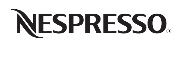

In [116]:
HTML(str(soup.select_one('.jobdescription')))